In [ ]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense      # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers        # 케라스의 옵티마이저를 임포트
import numpy as np # Numpy를 임포트
import matplotlib.pyplot as plt

X=np.array([0,1,2,3,4,5,6,7]) 
Y=np.array([0,0,0,0,1,1,1,1]) 

model=Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
RMSprop=optimizers.RMSprop(lr=0.01)
model.compile(optimizer=RMSprop ,loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X,Y, batch_size=1, epochs=200, shuffle=False)

plt.plot(X, Y, 'rx')
print(X)
print(model.predict(X))
plt.show()

In [ ]:
import matplotlib.pyplot as  plt
import numpy as np

class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        return z
    
    def fit(self, x, y, epochs=200):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산
                y_hat = self.activation(y_hat)
                err = y_hat - y_i       # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= 0.01*w_grad          # 가중치 업데이트
                self.b -= 0.01*b_grad          # 절편 업데이트

# x = np.array([1,2,3,4,5,6,7,8])
# y = np.array([0,0,0,0,1,1,1,1])
x = np.array([1,2,3,4,5,6,7,8,12])
y = np.array([0,0,0,0,1,1,1,1,1])                

neuron = Neuron()
neuron.fit(x, y)

for xi, yi in zip(x,y):
    plt.plot(xi,yi,"rx")

y_temp = []
for x_i in x:
    y_hat = neuron.forpass(x_i)
    if( y_hat >= 0.5 ):
        print("%d : 악성종양"%x_i)
    else:
        print("%d : 양성종양"%x_i)
    y_temp.append(y_hat)

plt.plot(x,y_temp)
plt.show()

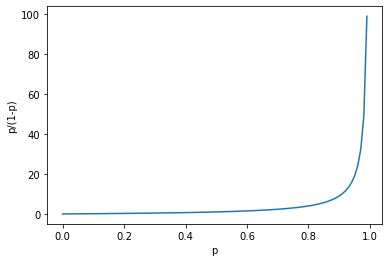

In [7]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
probs = np.arange(0, 1, 0.01)
# print(probs)
# print(len(probs))
odds = [p/(1-p) for p in probs]
plt.plot(probs, odds)
plt.xlabel('p')
plt.ylabel('p/(1-p)')
plt.show()

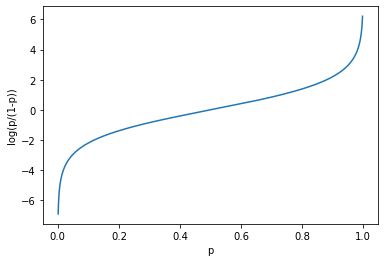

In [8]:
probs  = np.arange(0.001, 0.999, 0.001)
logit = [np.log(p/(1-p)) for p in probs]
plt.plot(probs, logit)
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.show()

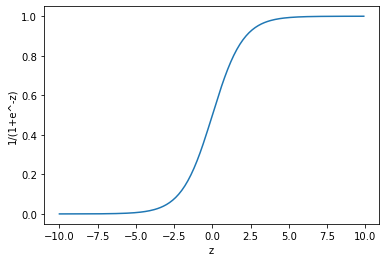

In [9]:
zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

### binary crossentropy 구현

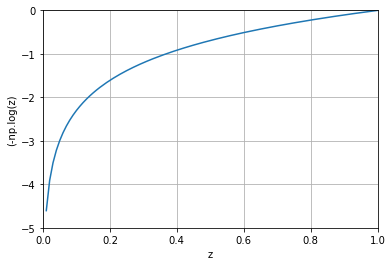

In [13]:
zs = np.arange(0.01, 10., 0.01)
gs = [np.log(z) for z in zs]
plt.plot(zs, gs)
plt.xlim(0,1)
plt.ylim(-5,0)
plt.xlabel('z')
plt.ylabel('(-np.log(z)')
plt.grid(True)
plt.show()

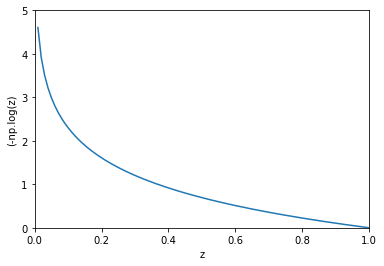

In [14]:
zs = np.arange(0.01, 10., 0.01)
gs = [-np.log(z) for z in zs]
plt.plot(zs, gs)
plt.xlim(0,1)
plt.ylim(0,5)
plt.xlabel('z')
plt.ylabel('(-np.log(z)')
plt.show()

C:\Users\jikim\AppData\Local\Temp/ipykernel_18648/1341036461.py:2: RuntimeWarning: divide by zero encountered in log
  gs = [-np.log(1-z) for z in zs]
C:\Users\jikim\AppData\Local\Temp/ipykernel_18648/1341036461.py:2: RuntimeWarning: invalid value encountered in log
  gs = [-np.log(1-z) for z in zs]


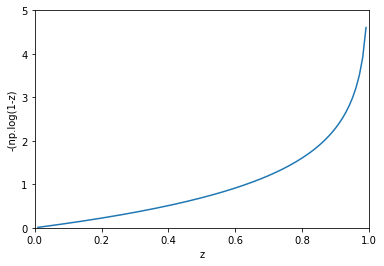

In [15]:
zs = np.arange(0.01, 10., 0.01)
gs = [-np.log(1-z) for z in zs]
plt.plot(zs, gs)
plt.xlim(0,1)
plt.ylim(0,5)
plt.xlabel('z')
plt.ylabel('-(np.log(1-z)')
plt.show()

1 : 양성종양
2 : 양성종양
3 : 양성종양
4 : 양성종양
5 : 악성종양
6 : 악성종양
7 : 악성종양
8 : 악성종양
20 : 악성종양


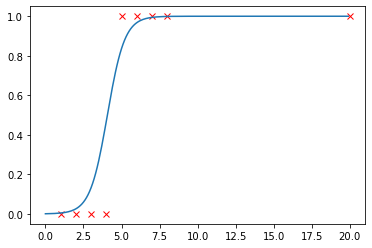

In [12]:
import matplotlib.pyplot as  plt
import numpy as np

class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x):
        z = x * self.w + self.b       # 직선 방정식을 계산합니다
        return z
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
#         a = z;
        a = 1/(1+np.exp(-z))
        return a
    
    def fit(self, x, y, epochs=200):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                z = self.forpass(x_i) # 정방향 계산
                a = self.activation(z)
                err = a - y_i      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= 0.1*w_grad          # 가중치 업데이트
                self.b -= 0.1*b_grad          # 절편 업데이트

# x = np.array([1,2,3,4,5,6,7,8])
# y = np.array([0,0,0,0,1,1,1,1])
x = np.array([1,2,3,4,5,6,7,8,20])
y = np.array([0,0,0,0,1,1,1,1,1])                

neuron = Neuron()
neuron.fit(x, y)

for xi, yi in zip(x,y):
    plt.plot(xi,yi,"rx")

for x_i in x:
    y_hat = neuron.forpass(x_i)
    a = neuron.activation(y_hat)
    if( a >= 0.5 ):
        print("%d : 악성종양"%x_i)
    else:
        print("%d : 양성종양"%x_i)
    y_temp.append(a)

x = np.arange(0,x[-1],0.1)
y_temp = []
  
for i, x_i in enumerate(x):
    y_hat = neuron.forpass(x_i)
    a = neuron.activation(y_hat)
    y_temp.append(a)    
    
plt.plot(x,y_temp)
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.data.shape, cancer.target.shape)

In [ ]:
cancer.data[:3]

In [ ]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [ ]:
cancer.feature_names[[3,23]]

In [ ]:
cancer.target

In [ ]:
np.unique(cancer.target)

In [ ]:
np.unique(cancer.target, return_counts=True)

In [ ]:
x = cancer.data
print(x.shape)
y = cancer.target
print(y.shape)
print(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, 
                                                    test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, x_test.shape)

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
print(x.shape[1])
w=np.ones(x.shape[1])
print(w)
# temp = np.zeros((2,3))
# print(temp)
# temp1 = np.full((2,3),7)
# print(temp1)

In [ ]:
a = np.array([1,2,3])
b = np.array([3,4,5])
print(a+b) # 원소별 합

print(a*b) # 원소별 곱 , 아다마르의 곱

print(np.sum(a*b))

In [ ]:
a = np.array([1,2,3])
print(a*3)

In [ ]:

class LogisticNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None

    def forpass(self, x):
#         print(x)
#         print(self.w)
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
#         print(z)
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100, rate = 0.01):   
#         print("x.shape=", x.shape)   # (455,30)
        self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
#         print(self.w.shape)          # (30,)
        self.b = 0                        # 절편을 초기화합니다.
#         print(x.shape[1])
        for i in range(epochs):           # epochs만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
#                 print("x_i.shape=", x_i.shape)  # x.shape=(455,30)  x[0].shape=(30,)
#                 print("y_i.shape=", y_i.shape)  # y.shape=(455,)    y[0].shape=()
                z = self.forpass(x_i)     # 정방향 계산
                a = self.activation(z)    # 활성화 함수 적용
#                 print("a=", a)
#                 print("y_i=", y_i)
                err = (a-y_i)          # 오차 계산
#                 print("err=", err)
                w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
                self.w -= rate*w_grad          # 가중치 업데이트
                self.b -= rate*b_grad          # 절편 업데이트
                
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]    # 정방향 계산
        a = self.activation(np.array(z))        # 활성화 함수 적용
        return a >= 0.5

In [ ]:
print(x_train.shape)

In [ ]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train, 1000)

In [ ]:
print(neuron.predict(x_test))
print(neuron.predict(x_test)== y_test)


In [ ]:
np.mean(neuron.predict(x_test) == y_test)